In [96]:
import numpy as np
import matplotlib.pyplot as plt

(100.0, 0.0)

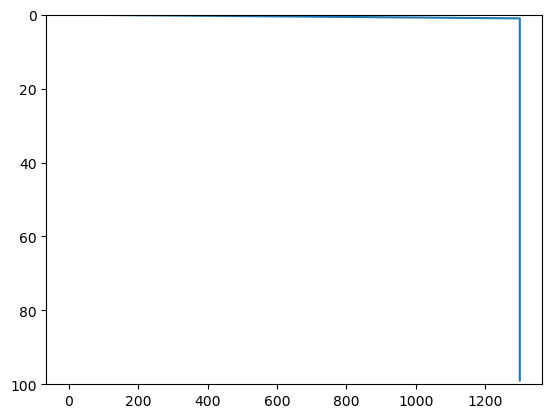

In [97]:
dz = 1e3

z = np.arange(0, 100000, dz)

# Temperatura incicial sob a dorsal meso-oceânica
T1 = 1300 # Temperatura base da litosfera
T0 = 0 # temperatura do topo da placa oceânica

T = np.zeros_like(z) + T1

T[0] = T0
plt.plot(T,z/1000)
plt.ylim(100,0)

(100.0, 0.0)

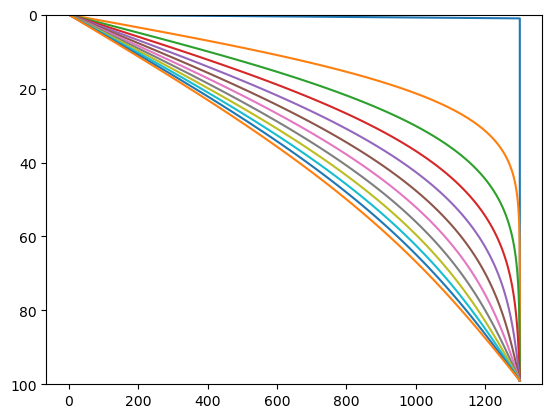

In [98]:
kappa = 1e-6 #m²/s - difusividade térmica da litosfera

t = 0
dt = 1000

sec_per_year = 365.25*24*60*60

fac = dt*sec_per_year*kappa/dz**2
tprint = 0
while t<60e6:
    if t >= tprint:
        plt.plot(T, z/1000)
        tprint += 5e6
    T[1:-1] += fac*(T[2:]-2*T[1:-1]+T[:-2])

    t += dt

plt.ylim(100,0)

# Estimando Densidade

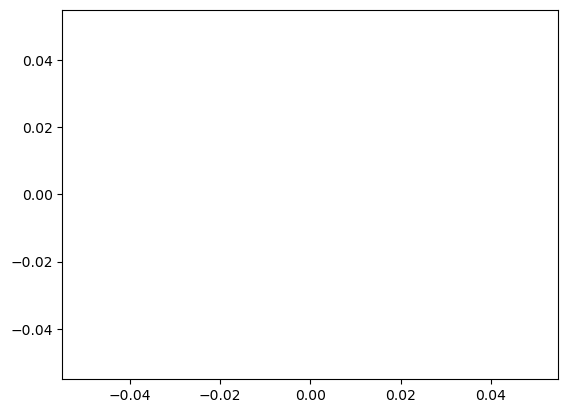

In [99]:
dz = 1e3

z = np.arange(0, 100000, dz)

# Temperatura incicial sob a dorsal meso-oceânica
T1 = 1300 # Temperatura base da litosfera
T0 = 0 # temperatura do topo da placa oceânica


rho_mantle = 3300 # Densidade do manto [kg/m³]
rho_water = 1e3 # Densidade da água [kg/m³]
alpha =  3.26e-5 # Coeficidente de expansão volumétrica [1/K]


T = np.zeros_like(z) + T1
T[0] = T0

T_original = np.copy(T)

subsidence = list()
time = list()
tprint = 0
while t<60e6:
    if t >= tprint:
        w = np.sum(rho_mantle*(T_original-T)*alpha*dz)/(rho_mantle-rho_water)
        subsidence = np.append(subsidence,w)
        time = np.append(time,t)
        tprint += 1e6
    T[1:-1] += fac*(T[2:]-2*T[1:-1]+T[:-2])

    t += dt
plt.plot(time, subsidence)


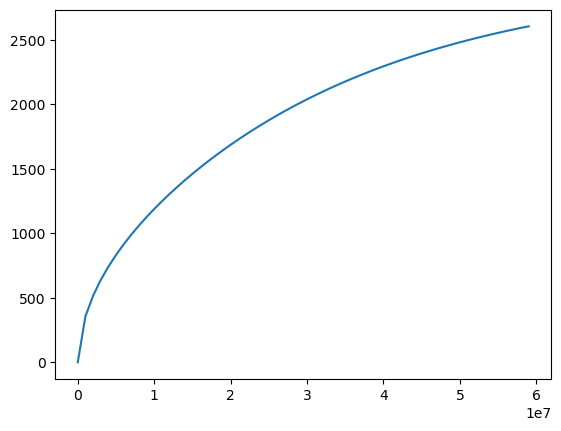

In [100]:
dz = 1000.0

z = np.arange(0.0, 100e3, dz)

T1 = 1300.0 # Temperatura Base da Litosfera
T0 = 0 # Temperatura da base da coluna d'água


T = np.zeros_like(z) + T1 # Temperatura Inical Sob a Dorsal Meso-oceânica

T[0] = T0

t = 0.0

dt = 1e3

tprint = 0 

subsidence = list()
time = list()

while t <60e6:
  if t >= tprint:
     w = np.sum(rho_mantle * (T_original - T) * alpha * dz / (rho_mantle-rho_water))
     subsidence = np.append(subsidence, w)
     time = np.append(time, t)
     tprint += 1e6
  T[1 :-1] += fac * (T[2:]- 2 * T[1:-1] + T[:-2])
  t += dt

plt.plot(time, subsidence)


In [102]:
import pandas as pd
df = pd.read_csv("../../data/batimetria.txt" , sep = "  " , header=0)
df


/tmp/ipykernel_28604/1122096897.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("../../data/batimetria.txt" , sep = "  " , header=0)


,idade[Myr],profundidade[km]
0,0.565327,2.897490
1,2.826633,3.171123
2,4.711055,3.393452
3,6.783920,3.581605
4,8.668342,3.701370
...,...,...
78,156.783920,5.461946
79,158.856784,5.462065
80,160.929648,5.299790
81,163.002513,5.231532
